# Telco Dataset: preprocessing and model evaluation

This Notebook is the product of an academic work for course [Artificial Intelligence & Robotics](https://kursuskatalog.cbs.dk/2019-2020/KAN-CINTO1820U.aspx), held at Copenhagen Business School during spring 2020.

<br>

*Course professors*

Daniel Hardt

Kim Normann Andersen

<br>

*Notebook authors*

Edoardo Abate

Michele Scarperi




In [0]:
# In this notebook we make use of mglearn for plotting graphs. It might be needed to install mglearn using pip.
# !pip install mglearn

## 1. First look at the dataset

###  Load Telco Customer Churn Data
Notice that the dataset can be retrieved at https://www.kaggle.com/blastchar/telco-customer-churn/data

In [0]:
import pandas as pd
import numpy as np

In [12]:
# Make sure the dataset is nested within folder "Data"
df = pd.read_csv("Data/Telco-Customer-Churn.csv", index_col=0)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Initial reflections  
The dataset contains a total of 20 features. Most of the feature columns are of type "Object" as they contain strings. They are *all* of categorical nature, and 12 of them are boolean categories (Yes/No). 

Three columns are of numerical nature `SeniorCitizen`(int64), `tenure`(int64) `MonthlyCharges`(float64). Surprisingly, `TotalCharges` is not a *float64* like `MonthlyCharges`, but an Object. We will investigate this further later on in this Notebook.

In [13]:
#There are no NAs. "count" returns 7043 for all features
df.isna().sum() 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### A more in-depth look at string features
We now want to understand the value structure of each string feature. We want to get an overview of:
- (1) the amount of unique values for each string feature; 
- (2) the unique values for each string feature.
Some of them are structured in a binary way. We can easily one hot encode these features using a single additional column.

Some other features present more categories, and they will have to be handled different. One hot enconding them will yield creating one additional column per unique value.

In [14]:
# We want to understand which string attributes are binary, which are of a higher category order
for col in df: 
    if df.dtypes[col]==np.object: # We disregard numerical attributes and only take a look at objects
        print(col,'(', len(df[col].unique()), ' unique values): ', df[col].unique(),'\n') 
        

gender ( 2  unique values):  ['Female' 'Male'] 

Partner ( 2  unique values):  ['Yes' 'No'] 

Dependents ( 2  unique values):  ['No' 'Yes'] 

PhoneService ( 2  unique values):  ['No' 'Yes'] 

MultipleLines ( 3  unique values):  ['No phone service' 'No' 'Yes'] 

InternetService ( 3  unique values):  ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ( 3  unique values):  ['No' 'Yes' 'No internet service'] 

OnlineBackup ( 3  unique values):  ['Yes' 'No' 'No internet service'] 

DeviceProtection ( 3  unique values):  ['No' 'Yes' 'No internet service'] 

TechSupport ( 3  unique values):  ['No' 'Yes' 'No internet service'] 

StreamingTV ( 3  unique values):  ['No' 'Yes' 'No internet service'] 

StreamingMovies ( 3  unique values):  ['No' 'Yes' 'No internet service'] 

Contract ( 3  unique values):  ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ( 2  unique values):  ['Yes' 'No'] 

PaymentMethod ( 4  unique values):  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Cre

## 2. Pre-processing

### Pre-processing string features
Some features present three unique values such as "Yes", "No" and "No internet service". We argue that "No internet service" can be merged into "No" with little harm done to the overall information. For the sake of integrity, we can save the information that the customer has "no internet service" in a new, additional, column. 


We now proceed with replacing value "No internet service" with "No" for a variety of columns.
For the same reason, value "No phone service" for feature `MultipleLines` is replaced with "No".


We use the dataframe method `replace()` to accomplish this.

In [15]:
# For the following list of features, we want to replace "No internet service" with "No"
featuresToProcess = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace "No internet service" with "No" for all of the above features
for feature in featuresToProcess:
    df = df.replace({feature: 'No internet service'}, 'No')

# Replace "No phone service" with "No" for attribute 'MultipleLines'
df = df.replace({'MultipleLines': 'No phone service'}, 'No')

# We check whether those attributes now present 2 unique values
for col in df: 
    if df.dtypes[col]==np.object: # Again, we disregard numerical attributes
        print(col,'(', len(df[col].unique()), ' unique values): ', df[col].unique(),'\n') 

gender ( 2  unique values):  ['Female' 'Male'] 

Partner ( 2  unique values):  ['Yes' 'No'] 

Dependents ( 2  unique values):  ['No' 'Yes'] 

PhoneService ( 2  unique values):  ['No' 'Yes'] 

MultipleLines ( 2  unique values):  ['No' 'Yes'] 

InternetService ( 3  unique values):  ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ( 2  unique values):  ['No' 'Yes'] 

OnlineBackup ( 2  unique values):  ['Yes' 'No'] 

DeviceProtection ( 2  unique values):  ['No' 'Yes'] 

TechSupport ( 2  unique values):  ['No' 'Yes'] 

StreamingTV ( 2  unique values):  ['No' 'Yes'] 

StreamingMovies ( 2  unique values):  ['No' 'Yes'] 

Contract ( 3  unique values):  ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ( 2  unique values):  ['Yes' 'No'] 

PaymentMethod ( 4  unique values):  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

TotalCharges ( 6531  unique values):  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 

Churn ( 2  unique values):  

### Pre-processing binary features
The next step is to *one-hot* encode binary features. We make us of `get_dummies()` and a small function written by us, `boolify()`, to create new columns in the dataset.

For each binary feature, we generate a single `bool` column. Value "`Yes`" is cast into `1`, while "`No`" is cast into `0`.

Feature `gender` is handled in a similar way, though the generated `boolMale` column simply  represents "`Male`" as `1` and "`Female`" as `0`.

In [16]:
# Our boolify() takes a dataframe and a column as input, returns the same dataset with a new column, 
# where the input column is encoded with binary values.
def boolify(dataframe, columns):
    boolDataframe = dataframe; #Instantiate the input dataframe locally
    for columnName in columns:
        oneHotColumns = pd.get_dummies(dataframe[columnName])
        oneHotColumns = oneHotColumns.drop('No', axis = 1) # We are only interested in keeping the "Yes"
        oneHotColumns = oneHotColumns.rename(columns={"Yes": "bool"+columnName}, errors="raise")
        boolDataframe = boolDataframe.join(oneHotColumns) # We add the binary column to the input dataframe
    return boolDataframe


# We first turn binary columns into one hot encoded columns
df = boolify(df, ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'])


# We turn "gender" column into a boolean one hot encoded column 'boolMale'
oneHotColumns = pd.get_dummies(df['gender'])
oneHotColumns = oneHotColumns.drop('Female',axis = 1)
oneHotColumns = oneHotColumns.rename(columns={"Male": "boolMale"}, errors="raise")
df = df.join(oneHotColumns)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,boolPartner,boolDependents,boolPhoneService,boolMultipleLines,boolOnlineSecurity,boolOnlineBackup,boolDeviceProtection,boolTechSupport,boolStreamingTV,boolStreamingMovies,boolPaperlessBilling,boolChurn,boolMale
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,0,0,1,0,0,0,0,1,0,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0,1,0,1,0,1,0,0,0,0,0,1
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,0,1,1,0,0,0,0,1,1,1
7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,1,0,1,1,0,0,0,0,1
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,0,0,0,0,0,0,0,1,1,0


### Pre-processing string features with multiple values
Columns `InternetService`, `Contract` and `PaymentMethod` present multiple unique values. We generate *one-hot encoded* columns for each unique value, for all three features.

The *one-hot* encoded columns are then added to the already processed dataframe.

In [0]:
# We one hot encode column "InternetService"
oneHotColumns = pd.get_dummies(df['InternetService'], prefix='boolInternetService')
df = df.join(oneHotColumns)

# We one hot encode column "Contract"
oneHotColumns = pd.get_dummies(df['Contract'], prefix='boolContract')
df = df.join(oneHotColumns)

# We one hot encode column "PaymentMethod"
oneHotColumns = pd.get_dummies(df['PaymentMethod'], prefix='boolPaymentMethod')
df = df.join(oneHotColumns)

### Pre-processing feature `TotalCharges`
As previously noticed, `TotalCharges` is of type Object instead of Float64.
We first tried to conver it to `float` using astype(). However, this throws an exception.

We therefore try to figure out what values are causing this issue. According to StackOverflow, this is most likely caused by a whitespaces.

In [18]:
# Using `df["TotalCharges"] = df["TotalCharges"].astype(float)` throws an exception
validValues = 0
notNumericValues = []
for string in df['TotalCharges']:
    if " " in string:
        notNumericValues.append(string)
        
print("Found (",len(notNumericValues),") whitespaces")
print(notNumericValues)

Found ( 11 ) whitespaces
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


### Fixing `TotalCharges`
We drop (11) rows with whitespaces entries for `TotalCharges`. Then, we can finally convert `TotalCharges` to float

In [19]:
df = df[df["TotalCharges"]!= " "]
df = df.reset_index()[df.columns]

# We can finally convert TotalCharges to float
df["TotalCharges"] = df["TotalCharges"].astype(float)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   gender                                       7032 non-null   object 
 1   SeniorCitizen                                7032 non-null   int64  
 2   Partner                                      7032 non-null   object 
 3   Dependents                                   7032 non-null   object 
 4   tenure                                       7032 non-null   int64  
 5   PhoneService                                 7032 non-null   object 
 6   MultipleLines                                7032 non-null   object 
 7   InternetService                              7032 non-null   object 
 8   OnlineSecurity                               7032 non-null   object 
 9   OnlineBackup                                 7032 non-null   object 
 10  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,boolPartner,boolDependents,boolPhoneService,boolMultipleLines,boolOnlineSecurity,boolOnlineBackup,boolDeviceProtection,boolTechSupport,boolStreamingTV,boolStreamingMovies,boolPaperlessBilling,boolChurn,boolMale,boolInternetService_DSL,boolInternetService_Fiber optic,boolInternetService_No,boolContract_Month-to-month,boolContract_One year,boolContract_Two year,boolPaymentMethod_Bank transfer (automatic),boolPaymentMethod_Credit card (automatic),boolPaymentMethod_Electronic check,boolPaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0


### Normalizing numerical features
Columns `tenure`, `MonthlyCharges` and `TotalCharges` contain numbers. It is good practice to squash their values between 0 and 1, as this will reduce training time for our models later on.


In [20]:
# We get all the numerical features
data = df.select_dtypes(np.number)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,boolPartner,boolDependents,boolPhoneService,boolMultipleLines,boolOnlineSecurity,boolOnlineBackup,boolDeviceProtection,boolTechSupport,boolStreamingTV,boolStreamingMovies,boolPaperlessBilling,boolChurn,boolMale,boolInternetService_DSL,boolInternetService_Fiber optic,boolInternetService_No,boolContract_Month-to-month,boolContract_One year,boolContract_Two year,boolPaymentMethod_Bank transfer (automatic),boolPaymentMethod_Credit card (automatic),boolPaymentMethod_Electronic check,boolPaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0


In [21]:
def normalizeColumn(dataframe, columns):
    for column in columns:
        minVal = data[column].min()
        maxVal = data[column].max()
        dataframe[column] = ( dataframe[column] - minVal ) / (maxVal - minVal)
    return dataframe;

data = normalizeColumn(data, ["tenure", "MonthlyCharges", "TotalCharges"])
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,boolPartner,boolDependents,boolPhoneService,boolMultipleLines,boolOnlineSecurity,boolOnlineBackup,boolDeviceProtection,boolTechSupport,boolStreamingTV,boolStreamingMovies,boolPaperlessBilling,boolChurn,boolMale,boolInternetService_DSL,boolInternetService_Fiber optic,boolInternetService_No,boolContract_Month-to-month,boolContract_One year,boolContract_Two year,boolPaymentMethod_Bank transfer (automatic),boolPaymentMethod_Credit card (automatic),boolPaymentMethod_Electronic check,boolPaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,0,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0


## EDA

### Principal Component Analysis (PCA)

In [22]:
# We separate features from target
y = data["boolChurn"]
X = data.drop('boolChurn', axis = 1)

print(X.shape)
print(y.shape)

(7032, 26)
(7032,)


Original shape: (7032, 26)
Reduced shape: (7032, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Second principal component')

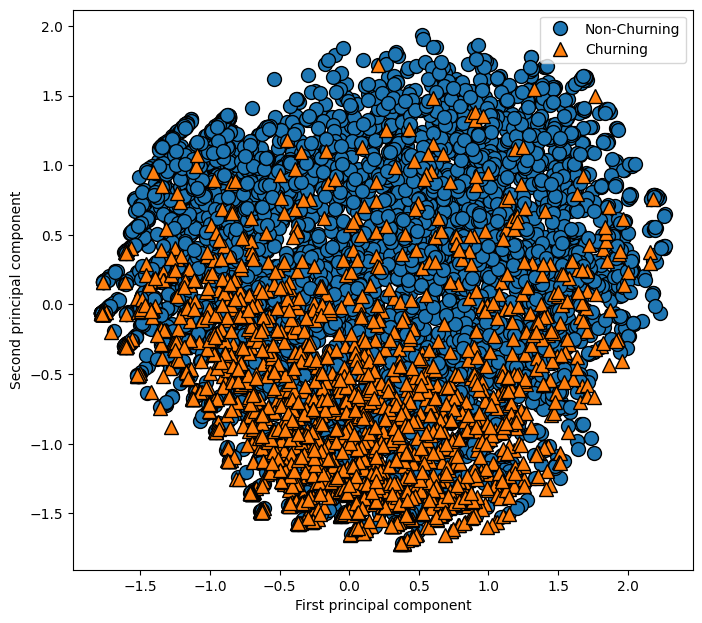

In [23]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import mglearn

pca = PCA(n_components=2).fit(X)


X_pca = pca.transform(X)
print("Original shape: {}".format(str(X.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

plt.style.use("default")
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y)
plt.legend(["Non-Churning", "Churning"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

The two classes overlap a lot in the two-dimensional space plotted using the top two principal components. This would suggest that a linear classifier would not be able to separate churning from non-churning customers well. 

We now compute histograms of each of the features for the two classes, *Churning* and *Non-Churning*, to check whether any feature manages to tell them apart.

For `bool` features, we correctly see discrete values, either `0` or `1`.

<Figure size 640x480 with 0 Axes>

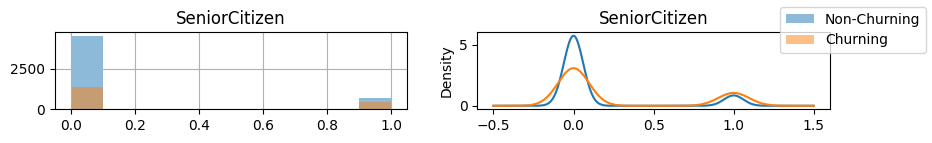

<Figure size 640x480 with 0 Axes>

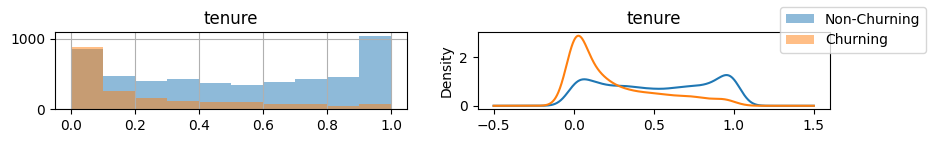

<Figure size 640x480 with 0 Axes>

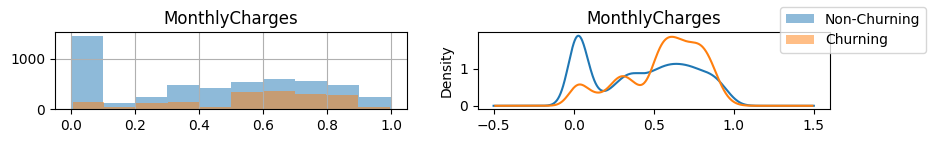

<Figure size 640x480 with 0 Axes>

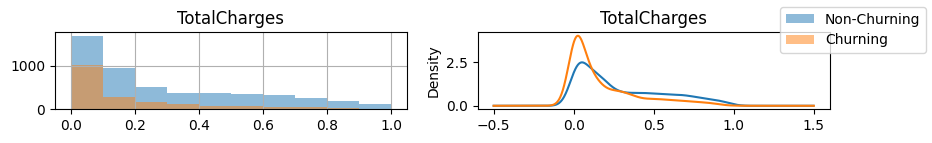

<Figure size 640x480 with 0 Axes>

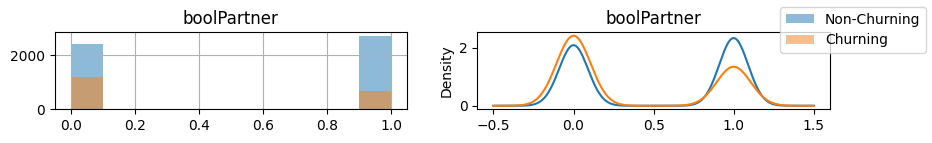

<Figure size 640x480 with 0 Axes>

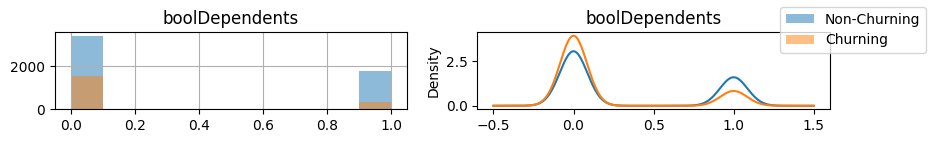

<Figure size 640x480 with 0 Axes>

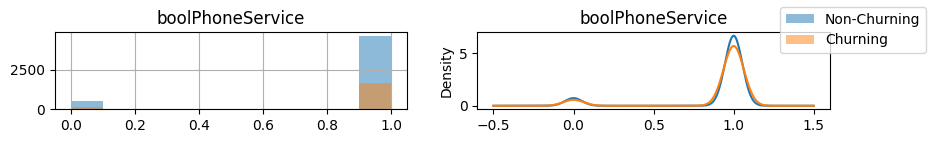

<Figure size 640x480 with 0 Axes>

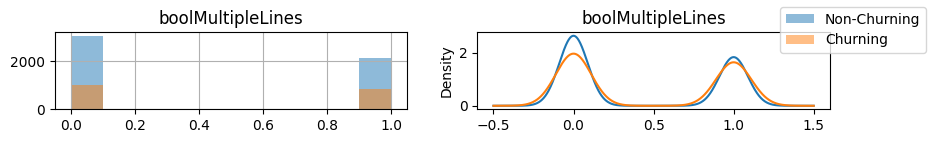

<Figure size 640x480 with 0 Axes>

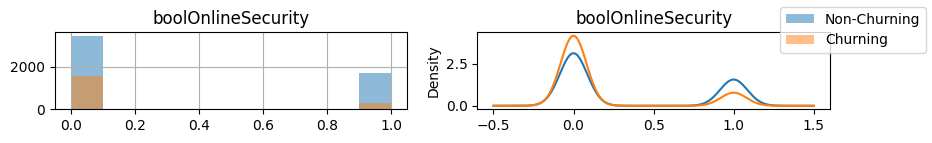

<Figure size 640x480 with 0 Axes>

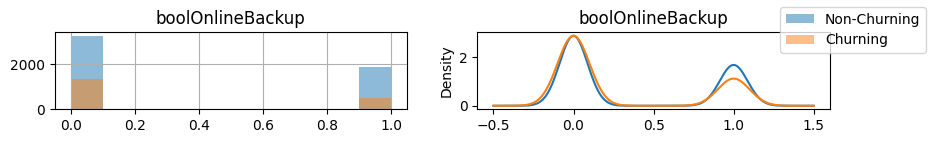

<Figure size 640x480 with 0 Axes>

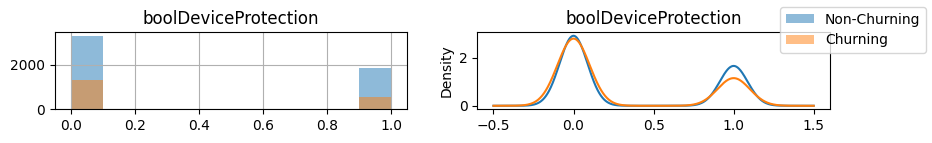

<Figure size 640x480 with 0 Axes>

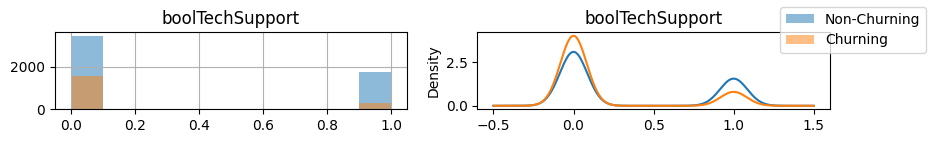

<Figure size 640x480 with 0 Axes>

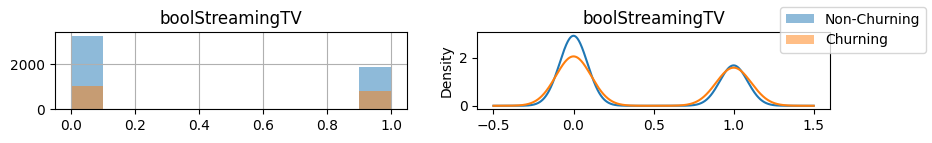

<Figure size 640x480 with 0 Axes>

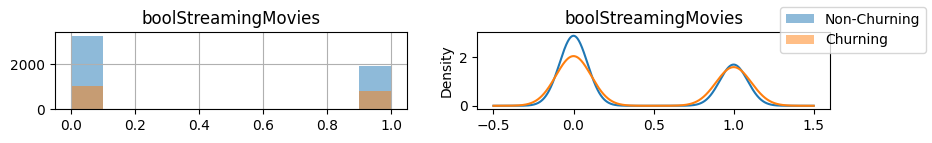

<Figure size 640x480 with 0 Axes>

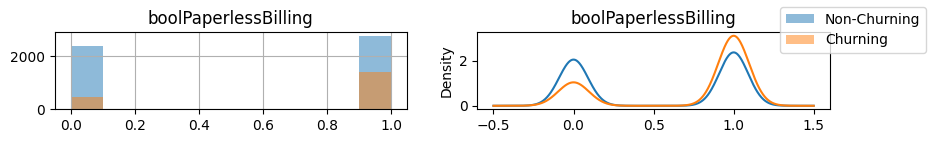

<Figure size 640x480 with 0 Axes>

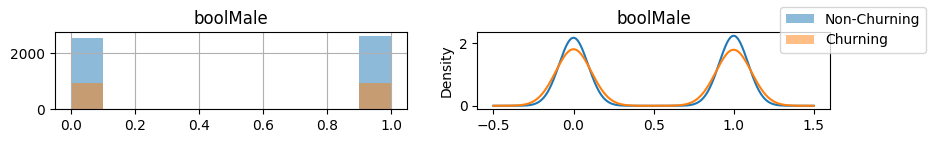

<Figure size 640x480 with 0 Axes>

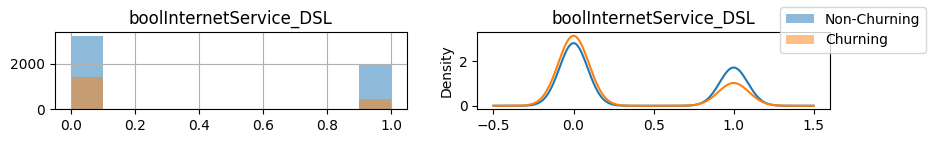

<Figure size 640x480 with 0 Axes>

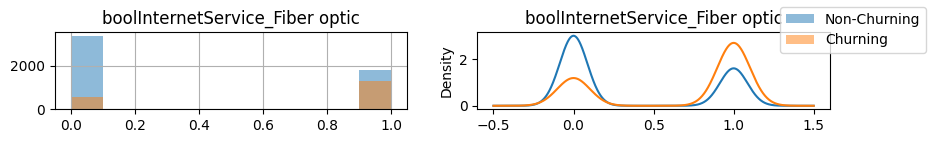

<Figure size 640x480 with 0 Axes>

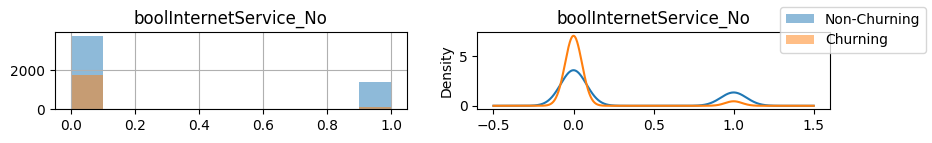

<Figure size 640x480 with 0 Axes>

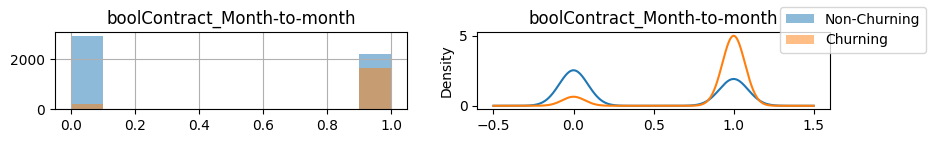

<Figure size 640x480 with 0 Axes>

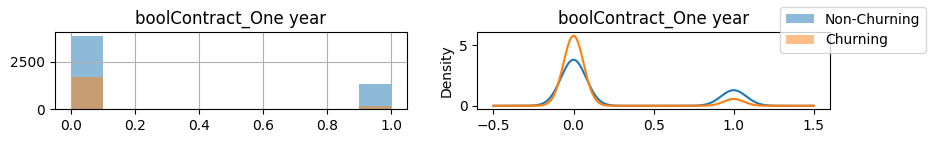

<Figure size 640x480 with 0 Axes>

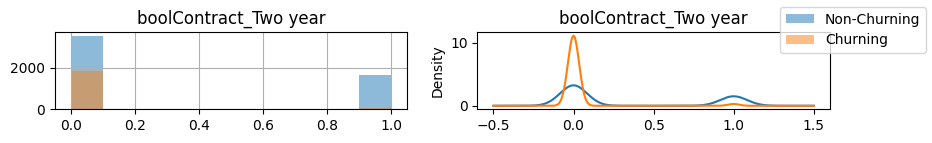

<Figure size 640x480 with 0 Axes>

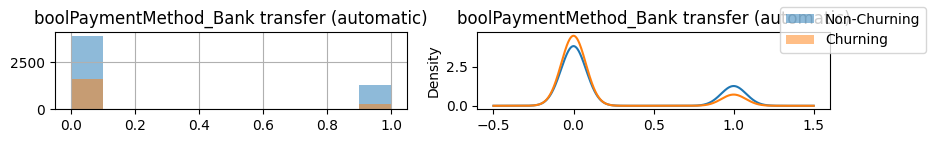

<Figure size 640x480 with 0 Axes>

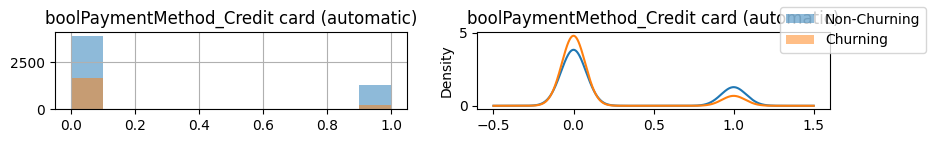

<Figure size 640x480 with 0 Axes>

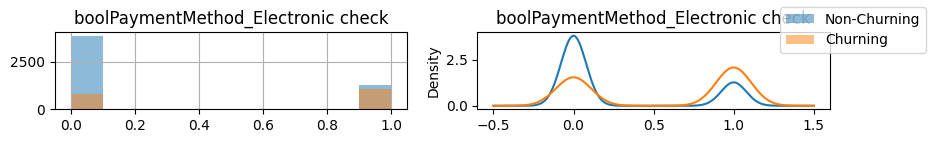

<Figure size 640x480 with 0 Axes>

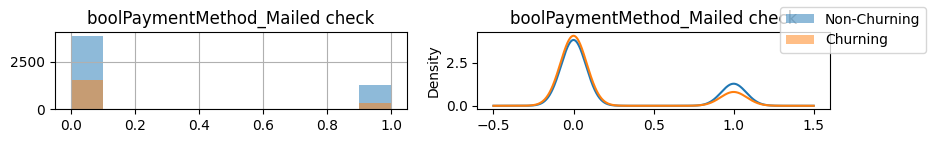

In [24]:
# We get the list of pre-processed features
features = X.columns

for feature in features:
  plt.clf()
  fig, axs = plt.subplots(ncols=2, figsize=(10, 1))
  data.groupby("boolChurn")[feature].plot(kind='kde', ax=axs[1])
  data.groupby("boolChurn")[feature].hist(alpha=0.5, ax=axs[0])
  axs[0].set_title(feature)
  axs[1].set_title(feature)
  fig.legend(["Non-Churning","Churning"])
  plt.show()
  

No feature allows to tell the classes apart. However, we can notice some interesting patterns. 

Churning happens almost exclusively when the contract type is month-to-month, as opposed to longer formats.

Customers are equally likely to churn, independently of the gener.

A more in depth visualization of the features against the target classes is available in the *EDA_In_Depth* Notebook. We recommend checking it out.

Finally, we compute correlation for each feature against target classes.

In [25]:
churn_corr = df.corr()['boolChurn']
churn_corr.abs().sort_values(ascending=False)[1:]

boolContract_Month-to-month                    0.404565
tenure                                         0.354049
boolInternetService_Fiber optic                0.307463
boolContract_Two year                          0.301552
boolPaymentMethod_Electronic check             0.301455
boolInternetService_No                         0.227578
TotalCharges                                   0.199484
MonthlyCharges                                 0.192858
boolPaperlessBilling                           0.191454
boolContract_One year                          0.178225
boolOnlineSecurity                             0.171270
boolTechSupport                                0.164716
boolDependents                                 0.163128
SeniorCitizen                                  0.150541
boolPartner                                    0.149982
boolPaymentMethod_Credit card (automatic)      0.134687
boolInternetService_DSL                        0.124141
boolPaymentMethod_Bank transfer (automatic)    0

## 3. Models evaluation
In this section, we evaluate the performance of various *machine learning* models, as well as a small *neural network*.

To do so, we first define training and a test data from the previously pre-processed dataset. We initially try to train the models with all the features. In a subsequent iteration, we evaluate the models by limiting the features to the top 10 correlated ones.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 27) (5625,)
(1407, 27) (1407,)


### Machine Learning models

The models we evaluate are: 
- K-NN Classifier
- Support Vector Classifier (SVC)
- Logistic Regression Classifier
- Random Forest Classifier
- Naive Bayes Classifier.

For each classifier, we run a Grid Search with cross-validation. After a first Grid Search, we plot the runs using a function written by us `plotGridSearchRuns()` to keep the code more clean.

`plotGridSearchRuns()` visualizes a heat-map with all the runs of cross-validation, with a particular
parameter setting. Cross-validation accuracy is encoded with color. The lighter the color, the higher the accuracy.  It allows us to optimize the region searched for the various parameters.

`plotGridSearchRuns()` can only plot two parameters from the parameter grid, since it would become troublesome to visualize more than three dimensions (the three dimensions being the two parameters and the accuracy).

#### Classifiers list

In [0]:
# It might be needed to install mglearn using pip
# !pip install mglearn

In [0]:
from sklearn.model_selection import GridSearchCV

# The following simply generalize our GridSearchCV code, so that future sections are easier to read
def runGridSearch(model, param_grid, cv=5):
  global grid_search
  grid_search = GridSearchCV(model, param_grid, cv=cv)
  grid_search.fit(X_train, y_train)
  print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
  print("Best parameters: {}".format(grid_search.best_params_))
  print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Notice that the following function only supports two input parameters.
# It would become troublesome to visualize more than three dimensions (the two parameters and the accuracy)
import mglearn

def plotGridSearchRuns(firstParam, secondParam, cmap="viridis"):
  results = pd.DataFrame(grid_search.cv_results_)
  scores = np.array(results.mean_test_score).reshape(len(param_grid[firstParam]), len(param_grid[secondParam]))
  mglearn.tools.heatmap(scores, xlabel=secondParam, xticklabels=param_grid[secondParam],
  ylabel=firstParam, yticklabels=param_grid[firstParam], cmap=cmap)
  


#### k-Nearest Neighbors (k-NN)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [1, 5, 10, 15],
'weights': ['uniform', 'distance']}


runGridSearch(KNeighborsClassifier(), param_grid)

Test set score: 0.78
Best parameters: {'n_neighbors': 15, 'weights': 'uniform'}
Best cross-validation score: 0.78


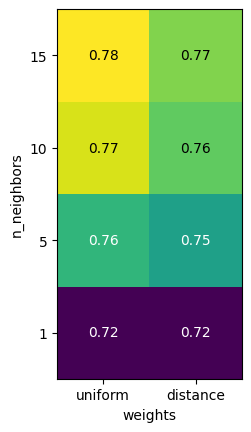

In [0]:
plotGridSearchRuns('n_neighbors', 'weights')

In [0]:
param_grid = {'n_neighbors': [20, 25, 30, 40, 60],
'weights': ['uniform', 'distance']}


runGridSearch(KNeighborsClassifier(), param_grid)

Test set score: 0.79
Best parameters: {'n_neighbors': 40, 'weights': 'uniform'}
Best cross-validation score: 0.79


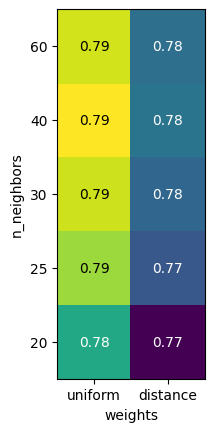

In [0]:
plotGridSearchRuns('n_neighbors', 'weights')

#### Naive Bayes Classifier

Test set score: 0.78
Best parameters: {'alpha': 0.001, 'fit_prior': True}
Best cross-validation score: 0.78


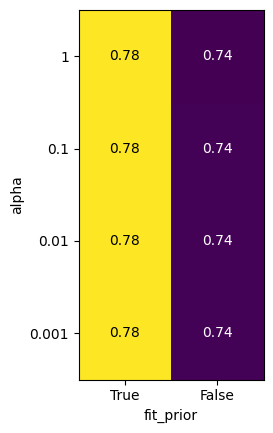

In [0]:
from sklearn.naive_bayes import MultinomialNB

param_grid = {'alpha': [0.001, 0.01, 0.1, 1],
'fit_prior': [True, False]}

runGridSearch(MultinomialNB(), param_grid)
plotGridSearchRuns('alpha', 'fit_prior')


Test set score: 0.78
Best parameters: {'alpha': 100, 'fit_prior': True}
Best cross-validation score: 0.78


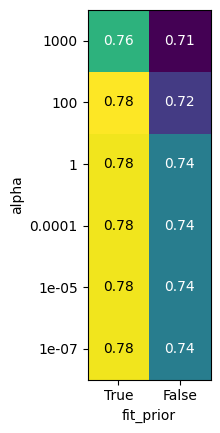

In [0]:
param_grid = {'alpha': [1e-07, 1e-05, 0.0001, 1, 100, 1000],
'fit_prior': [True, False]}

runGridSearch(MultinomialNB(), param_grid)

plotGridSearchRuns('alpha', 'fit_prior')

#### Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

Test set score: 0.81
Best parameters: {'C': 100, 'solver': 'saga'}
Best cross-validation score: 0.81


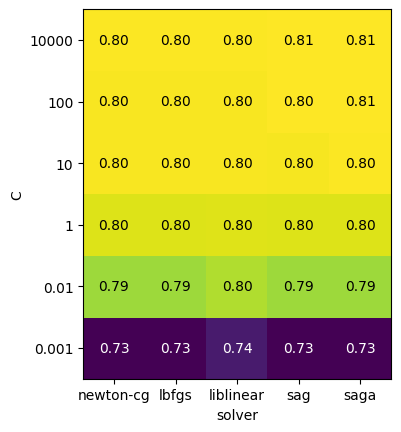

In [0]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 1, 10, 100, 10000],
'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

runGridSearch(LogisticRegression(), param_grid)

plotGridSearchRuns('C', 'solver')

Test set score: 0.81
Best parameters: {'C': 1000, 'max_iter': 40000, 'solver': 'newton-cg'}
Best cross-validation score: 0.80


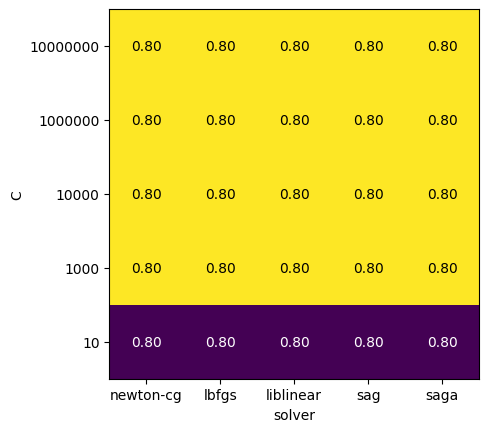

In [0]:
param_grid = {'C': [10, 1000, 10000, 1000000, 10000000],
'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
'max_iter': [40000]} # We are setting `max_iter` to avoid "convergence warning"

runGridSearch(LogisticRegression(), param_grid)

plotGridSearchRuns('C', 'solver')

#### Linear Support Vector Machines (Linear SVC)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Test set score: 0.80
Best parameters: {'C': 0.01, 'tol': 1}
Best cross-validation score: 0.80


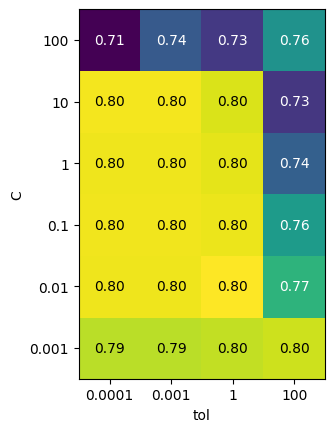

In [0]:
from sklearn.svm import LinearSVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'tol': [1e-4, 0.001, 1, 100]}


runGridSearch(LinearSVC(), param_grid)
plotGridSearchRuns('C', 'tol')


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Test set score: 0.80
Best parameters: {'C': 0.15, 'max_iter': 10000, 'tol': 1}
Best cross-validation score: 0.80


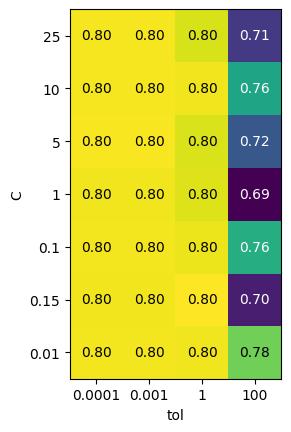

In [0]:
param_grid = {'C': [0.01, 0.15, 0.1, 1, 5, 10, 25],
'tol': [1e-4, 0.001, 1, 100],
'max_iter': [10000]
}


runGridSearch(LinearSVC(), param_grid)
plotGridSearchRuns('C', 'tol')


#### Random Forest Classifier

Test set score: 0.78
Best parameters: {'max_features': 10, 'n_estimators': 100}
Best cross-validation score: 0.79


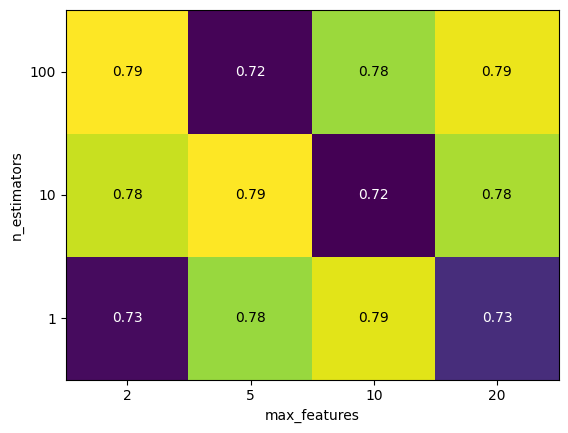

In [0]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [1, 10, 100],
'max_features': [2, 5, 10, 20]}


runGridSearch(RandomForestClassifier(), param_grid)

plotGridSearchRuns('n_estimators', 'max_features')

Test set score: 0.79
Best parameters: {'max_features': 5, 'n_estimators': 100}
Best cross-validation score: 0.79


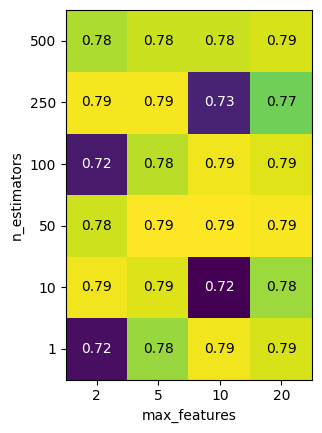

In [0]:
param_grid = {'n_estimators': [1, 10, 50, 100, 250, 500],
'max_features': [2, 5, 10, 20]
}

runGridSearch(RandomForestClassifier(), param_grid)

plotGridSearchRuns('n_estimators', 'max_features')

#### Support Vector Classifier (SVC)

Test set score: 0.81
Best parameters: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 0.80


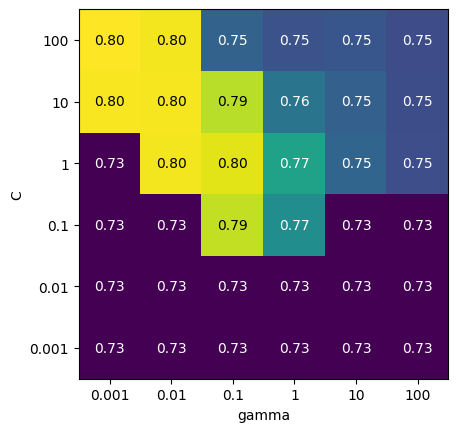

In [0]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}


runGridSearch(SVC(), param_grid)

plotGridSearchRuns('C', 'gamma')

Test set score: 0.81
Best parameters: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 0.80


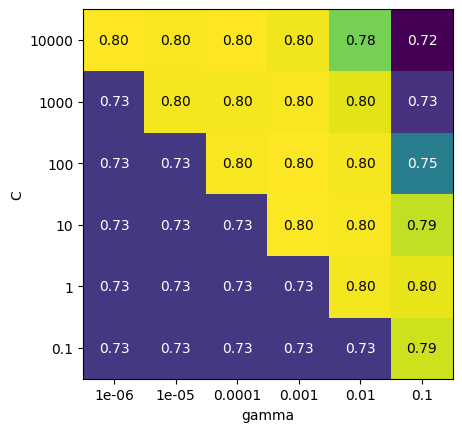

In [0]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],
'gamma': [1e-06, 1e-05, 1e-04, 0.001, 0.01, 0.1]}

runGridSearch(SVC(), param_grid)

plotGridSearchRuns('C', 'gamma')

### Deep Learning model

#### Multi-Layer Perceptron (MLP)

In [0]:
from sklearn.neural_network import MLPClassifier

param_grid = {'alpha': [1e-04, 0.01, 1],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'max_iter': [1000]}
param_grid = {
            'activation' : ['relu'],
            'solver' : ['sgd', 'adam'],
            'hidden_layer_sizes': [
              (20,10,5,),
              (10,8,4,),
              (5,5,)
            ],
            'learning_rate_init': [0.01, 0.1, 1],
            'max_iter': [100, 125, 150, 175, 200]
        }
       

# runGridSearch(MLPClassifier(), param_grid)



NN = MLPClassifier(random_state=0, solver="adam", learning_rate_init=0.0001, learning_rate='adaptive', batch_size=50)
NN.hidden_layer_sizes = (50, 25,5,)  
NN.activation = "relu"
NN.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=50, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 25, 5), learning_rate='adaptive',
              learning_rate_init=0.0001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

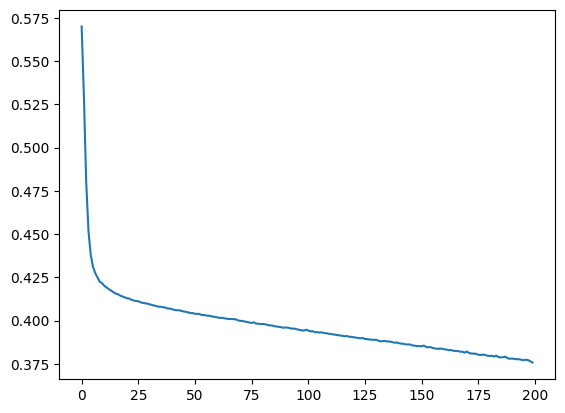

In [0]:
plt.plot(NN.loss_curve_)
plt.show()

In [0]:
NN.score(X_test,y_test)

0.8002842928216063